In [1]:
#SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv(r"C:\Users\Zohreh HP17\Desktop\[FVDM9406] Machine_Learning_I\Files_and_codes\S07\code-7\age_salary.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x=dataset.iloc[:,[2,3]].values
x.shape

(400, 2)

In [5]:
y=dataset.iloc[:,4].values
y.shape

(400,)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [7]:
x_train.shape

(280, 2)

In [8]:
x_test.shape

(120, 2)

In [9]:
%%capture
sc=StandardScaler()

In [10]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [11]:
classifier=SVC(kernel="linear",random_state=1)

In [12]:
classifier.fit(x_train,y_train);

In [13]:
r_ages=np.arange(start=x_test[:,0].min(),stop=x_test[:,0].max(),step=0.01)
r_salaries=np.arange(start=x_test[:,0].min(),stop=x_test[:,0].max(),step=0.01)

x1,x2=np.meshgrid(r_ages,r_salaries)

test=np.array([x1.ravel(),x2.ravel()]).T
test

array([[-1.97070171, -1.97070171],
       [-1.96070171, -1.97070171],
       [-1.95070171, -1.97070171],
       ...,
       [ 2.21929829,  2.23929829],
       [ 2.22929829,  2.23929829],
       [ 2.23929829,  2.23929829]])

In [14]:
pred=classifier.predict(test)
z=pred.reshape(x1.shape)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


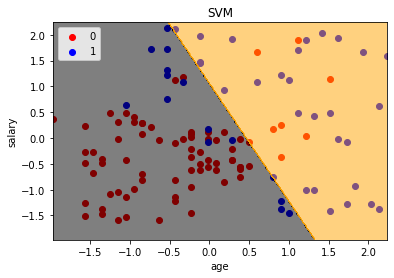

In [15]:
plt.scatter(x_test[y_test==0,0],x_test[y_test==0,1],c=ListedColormap(("r","b"))(0),label=0)
plt.scatter(x_test[y_test==1,0],x_test[y_test==1,1],c=ListedColormap(("r","b"))(1),label=1)

plt.contourf(x1,x2,z,alpha=0.5,cmap=ListedColormap(("k","orange")))

plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x1.max())

plt.title("SVM")
plt.xlabel("age")
plt.ylabel("salary")
plt.legend(loc="best")
plt.show()

In [16]:
classifier.score(x_train,y_train)

0.8678571428571429

In [17]:
classifier.score(x_test,y_test)

0.825